In [7]:
from prophet import Prophet #Prophet for the trend and seasonaly modeling
import warnings     # Suppress FutureWarning messages to prevent them from cluttering the output.
                    # This is useful when the warnings don't affect the current functionality
                    # but may relate to changes in future versions of libraries like pandas.
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

13:51:19 - cmdstanpy - INFO - Chain [1] start processing
13:51:19 - cmdstanpy - INFO - Chain [1] done processing


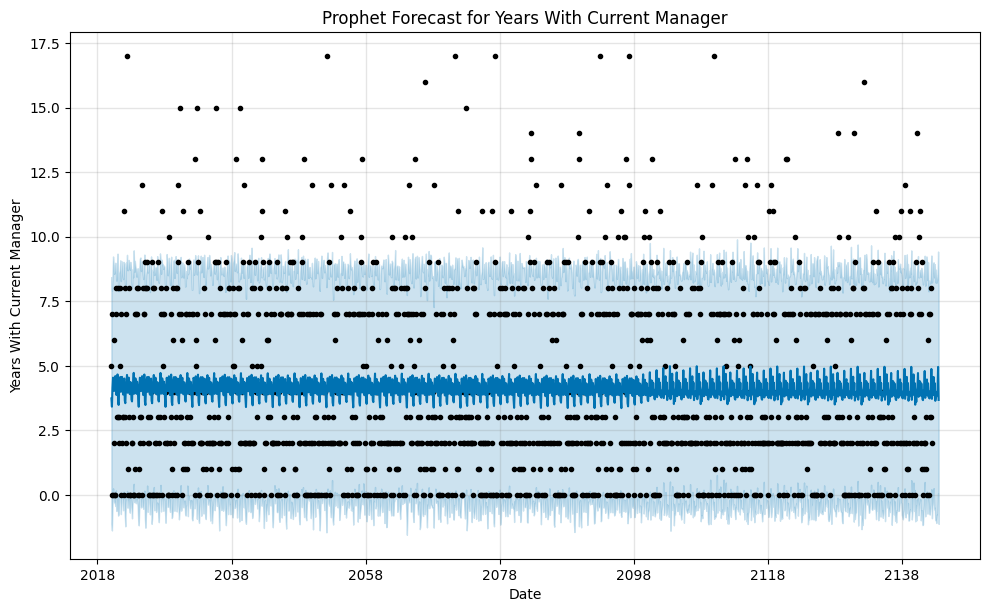

In [6]:
# Implement Prophet for HR Employee Attrition dataset
# Load the dataset
data2 = pd.read_csv(r"C:\Users\User\Downloads\archive (6)\HR-Employee-Attrition.csv")

# First, we need to ensure we have a date column. Assuming you want to forecast based on 'YearsWithCurrManager',
# we'll create a synthetic date range to demonstrate this.
# Here, we will assume that the data represents monthly entries over a period.
data2['Date'] = pd.date_range(start='2020-01-01', periods=len(data2), freq='M')

# Prepare the data for Prophet
prophet_data = data2[['Date', 'YearsWithCurrManager']].rename(columns={'Date': 'ds', 'YearsWithCurrManager': 'y'})

# Ensure the 'ds' column is in datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])

# Initialize and fit Prophet model
model_prophet = Prophet()
model_prophet.fit(prophet_data)

# Create future dataframe for forecasting
future = model_prophet.make_future_dataframe(periods=12, freq='M')  # Predicting for the next 12 months

# Make predictions
forecast_prophet = model_prophet.predict(future)

# Plotting the Prophet forecast
fig = model_prophet.plot(forecast_prophet)
plt.title('Prophet Forecast for Years With Current Manager')
plt.xlabel('Date')
plt.ylabel('Years With Current Manager')
plt.show()


Frequency of the time series data: <MonthEnd>


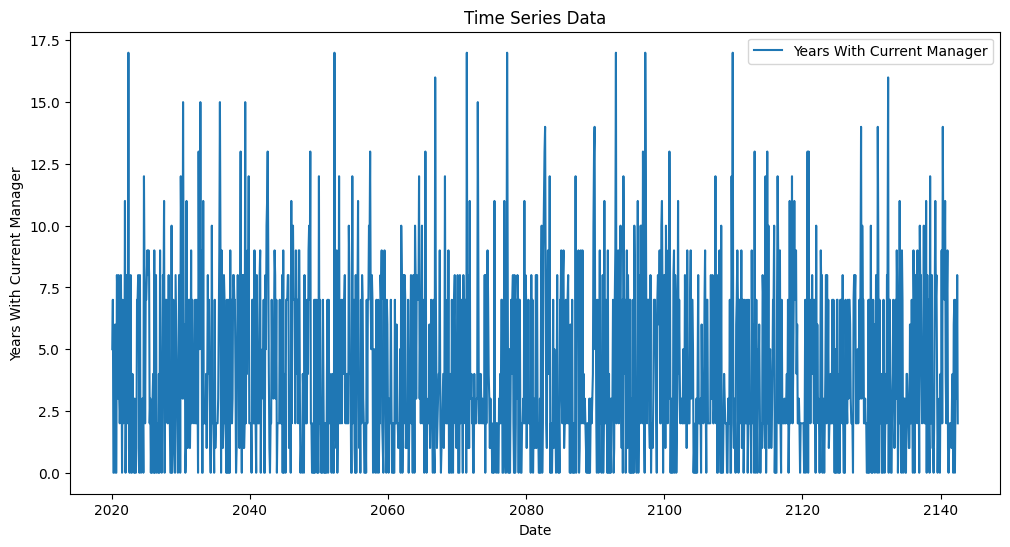

ADF Statistic: -25.406010950842454
p-value: 0.0
The time series is stationary
ADF Statistic: -13.7244334370157
p-value: 1.1713281383923595e-25
The time series is stationary


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     YearsWithCurrManager   No. Observations:                 1470
Model:                   ARIMA(1, 1, 1)   Log Likelihood               -3956.190
Date:                  Thu, 17 Oct 2024   AIC                           7918.380
Time:                          13:59:49   BIC                           7934.257
Sample:                      01-31-2020   HQIC                          7924.301
                           - 06-30-2142                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0263      0.025      1.044      0.296      -0.023       0.076
ma.L1         -0.9999      0.090    -11.081      0.000      -1.177      -0.823
sigma2        12.7237      1.420    

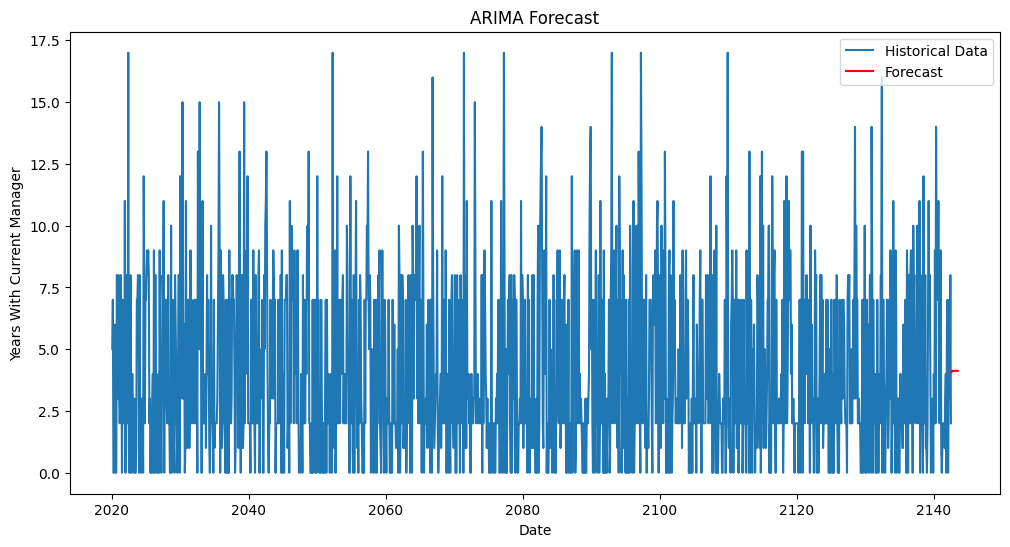

In [9]:
#Implement ARIMA fo HR Employee Attrition dataset
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Load the dataset
data2 = pd.read_csv(r"C:\Users\User\Downloads\archive (6)\HR-Employee-Attrition.csv")
# Create a date column and set the frequency
data2['Date'] = pd.date_range(start='2020-01-01', periods=len(data2), freq='M')

# Set the Date column as the index and specify the frequency
data2.set_index('Date', inplace=True)
data2.index = data2.index.to_period('M')  # Set the frequency to month-end

# Continue with your time series data
target_column = 'YearsWithCurrManager'
time_series_data = data2[target_column]

# Check the frequency
print("Frequency of the time series data:", time_series_data.index.freq)

# Proceed with plotting and modeling as before


# Create a date column. This will vary depending on your dataset.
data2['Date'] = pd.date_range(start='2020-01-01', periods=len(data2), freq='M')

# Set the Date column as the index
data2.set_index('Date', inplace=True)

# Selecting the column to forecast, for example, 'YearsWithCurrManager'
target_column = 'YearsWithCurrManager'
time_series_data = data2[target_column]

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Years With Current Manager')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Years With Current Manager')
plt.legend()
plt.show()

# Check stationarity using the Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("The time series is stationary")
    else:
        print("The time series is not stationary")

check_stationarity(time_series_data)

# If the series is not stationary, we can difference it
diff_data = time_series_data.diff().dropna()
check_stationarity(diff_data)

# Fit ARIMA model
# Specify the order (p, d, q) as per your analysis or use ACF/PACF plots for guidance
p = 1  # Number of lag observations included in the model (lag order)
d = 1  # Number of times that the raw observations are differenced (degree of differencing)
q = 1  # Size of the moving average window (order of moving average)

model = ARIMA(time_series_data, order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast future values
forecast = model_fit.forecast(steps=12)  # Forecasting for the next 12 periods

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Historical Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Years With Current Manager')
plt.legend()
plt.show()
